## Import images dataset from sklearn library

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
my_digits = load_digits()

In [3]:
dir(my_digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [17]:
my_digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Displaying images using matplotlib

<Figure size 432x288 with 0 Axes>

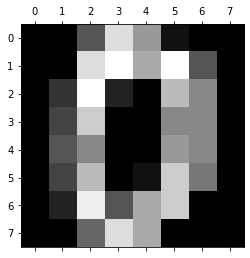

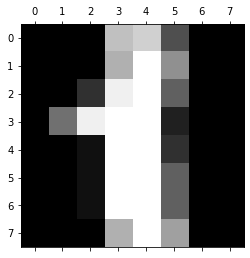

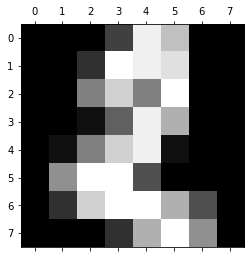

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(3):
    plt.matshow(my_digits.images[i])

## Creating dataframe for digits

In [19]:
df_digits = pd.DataFrame(my_digits.data)
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [20]:
my_digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
df_digits['target'] = my_digits.target

In [23]:
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## separating data into training and testing sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_digits.drop(['target'],axis='columns')
y = df_digits.target

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
print(len(x_train),len(x_test))

1437 360


In [34]:
print(len(y_train),len(y_test))

1437 360


## Creating model for Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model_digits = RandomForestClassifier()

In [45]:
model_digits.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
model_digits.score(x_test,y_test)

0.9583333333333334

In [51]:
y_predicted = model_digits.predict(x_test)
#y_predicted

## Using confusion matrix to see where model failed to predict

In [56]:
from sklearn.metrics import confusion_matrix
cm_digits = confusion_matrix(y_test,y_predicted)
cm_digits

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 29,  0,  0,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 36,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  1, 39]])

Text(69.0, 0.5, 'Truth')

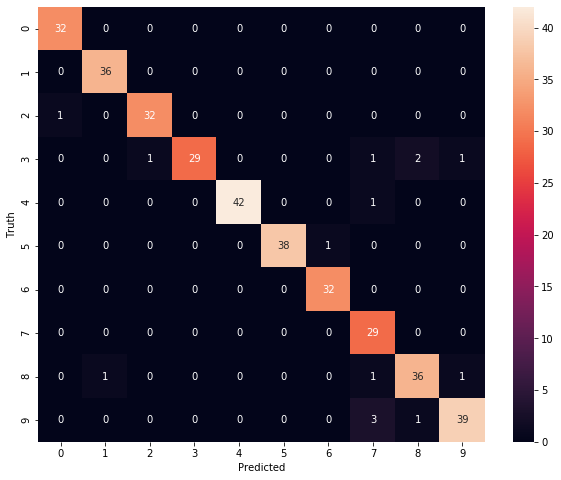

In [61]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm_digits,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')